In [1]:
from matplotlib import pyplot as plt
import numpy as np
from cpymad.madx import Madx
import pandas as pd

# Tutorial 4

## First part

### Periodic solution

In [2]:
myMad = Madx()
myString='''
quadrupoleLenght=0.1;
cellLength=10;

myK1=.1;// m^-2
myK2=.1;// m^-2
myK3=.1;// m^-2
myK4=.1;// m^-2

Q: quadrupole, L=quadrupoleLenght;

myCell:sequence, refer=center, L=cellLength;
myStart: marker, at=0;
q1: Q,K1:=myK1, at=2;
q2: Q,K1:=myK2, at=4;
q3: Q,K1:=myK3, at=6;
q4: Q,K1:=myK4, at=8;
myEnd: marker, at=10;
endsequence;

beam, particle=proton, energy=2;

use, sequence=myCell;
twiss;
'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.06.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2020.09.01               +
  + Execution date: 2021.01.19 11:10:34      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
++++++ warning: Twiss failed:  MAD-X continues


**Conclusions**: the periodic solution does not exist.

### IC solution

In [3]:
myString='''
twiss,betx=1, bety=2;
'''
myMad.input(myString);

enter Twiss module

++++++ table: summ

            length             orbit5               alfa            gammatr 
                10                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
       0.236117848                  0        85.59952509                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2150800354 

               dq2            betymax              dymax              dyrms 
                 0        61.41336649                  0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 

           synch_2            synch_3            synch_4            synch_5 
                 0                  0                  0                  0 

           synch_6            

In [4]:
myDFTable1=myMad.table['twiss'].dframe()
myDFTable1

name     keyword      s       betx      alfx       mux  \
#s          mycell$start:1      marker   0.00   1.000000  0.000000  0.000000   
mystart          mystart:1      marker   0.00   1.000000  0.000000  0.000000   
drift_0[0]       drift_0:0       drift   1.95   4.802500 -1.950000  0.174584   
q1                    q1:1  quadrupole   2.05   5.197436 -1.998042  0.177770   
drift_1[0]       drift_1:0       drift   3.95  16.257422 -3.823004  0.210905   
q2                    q2:1  quadrupole   4.05  17.014863 -3.748881  0.211862   
drift_2[0]       drift_2:0       drift   5.95  34.454604 -5.429930  0.224364   
q3                    q3:1  quadrupole   6.05  35.514267 -5.163174  0.224819   
drift_3[0]       drift_3:0       drift   7.95  57.945783 -6.642887  0.231487   
q4                    q4:1  quadrupole   8.05  59.223333 -6.128361  0.231758   
drift_4[0]       drift_4:0       drift  10.00  85.599525 -7.397891  0.236118   
myend              myend:1      marker  10.00  85.599525 -7.397891  0.236118   
#e            mycell$end:1      marker  10.00  85.599525 -7.397891  0.236118   

                 bety      alfy       muy    x  ...  sig54  sig55  sig56  \
#s           2.000000  0.000000  0.000000  0.0  ...    0.0    0.0    0.0   
mystart      2.000000  0.000000  0.000000  0.0  ...    0.0    0.0    0.0   
drift_0[0]   3.901250 -0.975000  0.122985  0.0  ...    0.0    0.0    0.0   
q1           4.105284 -1.066023  0.126963  0.0  ...    0.0    0.0    0.0   
drift_1[0]  10.034826 -2.054789  0.174794  0.0  ...    0.0    0.0    0.0   
q2          10.461302 -2.211390  0.176348  0.0  ...    0.0    0.0    0.0   
drift_2[0]  20.897199 -3.281187  0.196856  0.0  ...    0.0    0.0    0.0   
q3          21.580410 -3.553206  0.197606  0.0  ...    0.0    0.0    0.0   
drift_3[0]  37.361845 -4.752813  0.208263  0.0  ...    0.0    0.0    0.0   
q4          38.356732 -5.199368  0.208684  0.0  ...    0.0    0.0    0.0   
drift_4[0]  61.413366 -6.624547  0.215080  0.0  ...    0.0    0.0    0.0   
myend       61.413366 -6.624547  0.215080  0.0  ...    0.0    0.0    0.0   
#e          61.413366 -6.624547  0.215080  0.0  ...    0.0    0.0    0.0   

            sig61  sig62  sig63  sig64  sig65  sig66   n1  
#s            0.0    0.0    0.0    0.0    0.0    0.0  0.0  
mystart       0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_0[0]    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
q1            0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_1[0]    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
q2            0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_2[0]    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
q3            0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_3[0]    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
q4            0.0    0.0    0.0    0.0    0.0    0.0  0.0  
drift_4[0]    0.0    0.0    0.0    0.0    0.0    0.0  0.0  
myend         0.0    0.0    0.0    0.0    0.0    0.0  0.0  
#e            0.0    0.0    0.0    0.0    0.0    0.0  0.0  

[13 rows x 256 columns]

In [5]:
# These are the gradients
aux=myDFTable1[myDFTable1['keyword']=='quadrupole']
aux['k1l']/aux['l']

q1    0.1
q2    0.1
q3    0.1
q4    0.1
dtype: float64

Text(0, 0.5, '[m]')

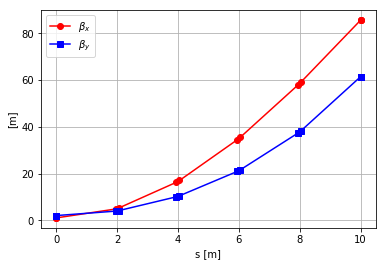

In [7]:
aux=myDFTable1
plt.plot(aux['s'],aux['betx'],'o-r', label='$\\beta_x$')
plt.plot(aux['s'],aux['bety'],'s-b', label='$\\beta_y$')
plt.legend(loc='best')
plt.grid()
plt.xlabel('s [m]')
plt.ylabel('[m]')